In [141]:
from pykat import finesse 
       
from pykat.commands import *     
import numpy as np               
import matplotlib.pyplot as plt  
import scipy                     
from IPython import display
              

pykat.init_pykat_plotting(dpi=200)

kat=finesse.kat()
kat_PRM=finesse.kat()
kat.verbose=True
kat_PRM.verbose=True

In [142]:
kat.parse("""

maxtem 3
l laser 30 0 n1                          #laser 1W
s gap01 1 n1 n2                         #space b/w mod and laser  
mod sb1 55.5556M 0.001 3 pm n2 n3         #modulator PM 55.5556M 3f
s gap02 0.5 n3 n31                     #space b/w mod and PRM      


##### FOR ANGULAR SENSING PRM #####
bs pickoff 0.0001 0.9999 0 45 n31 dump n32 refl_a
s s2 0.1 refl_a a8                       
bs bsQPD 0.5 0.5 0 45 a8 a9 a10 dump            #bs to split power between two detectors 

s sQPD1 0.1 a9 a11                   
s sQPD2 0.1 a10 a12

attr s2 g 45                                 #guoy phase for det1
attr sQPD1 g 50                                 #guoy phase for det1
attr sQPD2 g 140                                #guoy phase for det2

pd1 QPDrefl1 166.6668M 0 a11                       #Split detector1 refl
pdtype QPDrefl1 x-split   
pd1 QPDrefl2 166.6668M 90 a12                       #Split detector2 refl
pdtype QPDrefl2 x-split  

#######################


##### FOR ANGULAR SENSING ITM/ETM #####
s sr 0.01 n12 n12a    
bs pickoff1 0.0001 0.9999 0 45 n12a dump n121 refl_itm
s s21 0.1 refl_itm a81                       
bs bsQPD1 0.5 0.5 0 45 a81 a91 a101 dump            #bs to split power between two detectors 

s sQPD11 0.1 a91 a11a                   
s sQPD21 0.1 a101 a12a

attr s21 g 45                                 #guoy phase for det1
attr sQPD11 g 150                                 #guoy phase for det1
attr sQPD21 g 240                                #guoy phase for det2

pd1 QPDrefl1_itm 55.5556M 0 a11a                       #Split detector1 refl
pdtype QPDrefl1_itm x-split   
pd1 QPDrefl2_itm 55.5556M 90 a12a                       #Split detector2 refl
pdtype QPDrefl2_itm x-split  

#########################



####### 3 m setup ###########

s gap03 0.5 n32 refl

m PRM 0.759 0.1 90 refl pop               #PRM                ---> POP <---
#m PRM 0 1 90 refl pop               #PRM
s PRC 1.350 pop b3                        #PRC 
m ITM 0.98997 0.01 0 b3 n12              #ITM
s ARM 3.29 n121 b5                        #ARM length 3.3 (0.1 from sr length) 
m ETM 0.99996 0.00001 90 b5 b6           #ETM
#m ETM 0 1 0 b5 b6 

################################

cav PRCL PRM pop ITM b3
cav ARML ITM n12 ETM b5 
trace 2 


##### attr for TM ######

attr ETM Rc 11.3            # RoC of ETM
attr PRM Rc -23.6           # RoC of PRM

attr PRM xbeta 0            # misalgnment 
attr ETM xbeta 0         
attr ITM xbeta 0 
######################

##### PD #######

pd circ_arm b5
pd circ_prc pop
pd refl refl
pd trans b6
 

pd1 refl_I 55.5556M 0 refl              # REFL I  1f
pd1 refl_Q 55.5556M 90 refl             # REFL Q  1f
pd1 refl_I_f3 166.6668M 0 refl          # REFL I  3f
pd1 refl_Q_f3 166.6668M 90 refl         # REFL Q  3f
pd1 pop_I_raw 55.5556M 25 pop                # POP I  1f
pd1 pop_Q_raw 55.5556M 115 pop               # POP Q  1f
pd1 pop_I_f3_raw 166.6668M 0 pop            # POP I  3f
pd1 pop_Q_f3_raw 166.6668M 90 pop           # POP Q  3f

################






#x2axis ITM xbeta lin -0.3m 0.3m 800            #for 3d graph plotting

#xaxis PRM xbeta lin 0 0.3m 200
#xaxis ETM phi lin 85 95 900
#func prm_tune = 90 + $x1*0.1
#put PRM phi $prm_tune
yaxis lin abs

 

""")

In [143]:
kat_PRM = kat.deepcopy()
kat_PRM.parse("""


#### LOCK PRM ####
set errs refl_I_f3 re
lock clocks $errs 3000 0.1m
put* PRM phi $clocks
noplot clocks
#####

xaxis PRM xbeta lin 0 100u 900

""")

out = kat_PRM.run()
out.info()
#out.plot()

Parsing `set errs refl_I_f3 re` into pykat object not implemented yet, added as extra line.
--------------------------------------------------------------
Running kat - Started at 2022-10-18 02:46:21.137831


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 5.86947 seconds

--- Output info ---

Run date and time: 2022-10-18 02:46:21.137831
Detectors used: QPDrefl1, QPDrefl1_itm, QPDrefl2, QPDrefl2_itm, circ_arm, circ_prc, clocks, pop_I_f3_raw, pop_I_raw, pop_Q_f3_raw, pop_Q_raw, refl, refl_I, refl_I_f3, refl_Q, refl_Q_f3, trans

One xaxis used: ['xaxis PRM xbeta lin 0 0.0001 900']
QPDrefl1     : min = -4.238424284816960e-14 max = 4.506103519888600e-16
QPDrefl2     : min = 0.000000000000000e+00 max = 1.226112880342460e-14
QPDrefl1_itm : min = 0.000000000000000e+00 max = 4.670323576271450e-06
QPDrefl2_itm : min = -6.103032946557560e-06 max = 0.000000000000000e+00
circ_arm     : min = 1.806534893942260e+04 max = 3.717051811411240e+04
circ_prc     : min = 5.885950491764990e+01 max = 9.851360447579241e+01
refl         : min = 3.252758611202430e+00 max = 1.152111856923890e+01
trans        : min = 1.806607158228590e-01 max = 3.717200499431220e-01
refl_I       : min

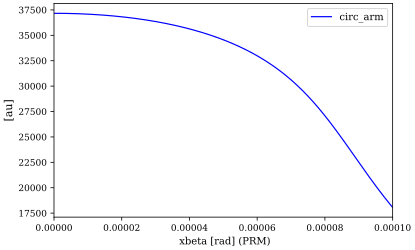

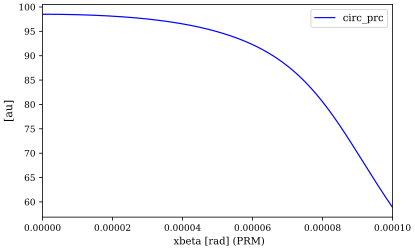

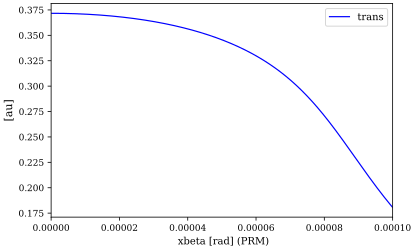

In [144]:
out.plot(['circ_arm'])
out.plot(['circ_prc'])
out.plot(['trans'])

In [145]:
#out.plot(['clocks'])

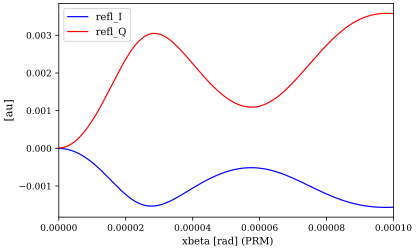

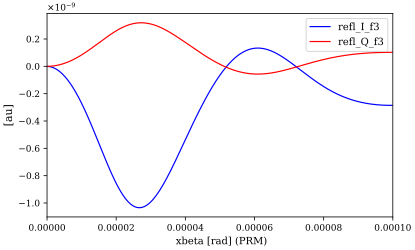

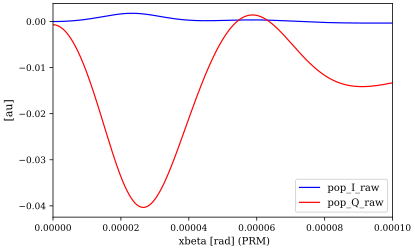

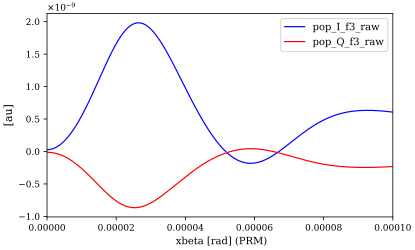

In [146]:
out.plot(['refl_Q','refl_I'])
out.plot(['refl_I_f3','refl_Q_f3'])

out.plot(['pop_I_raw','pop_Q_raw'])
out.plot(['pop_I_f3_raw','pop_Q_f3_raw'])



In [147]:
#out.stdout

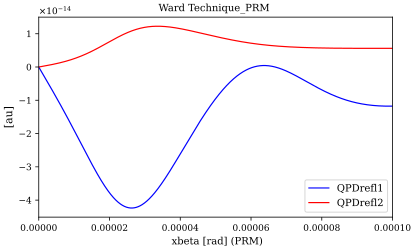

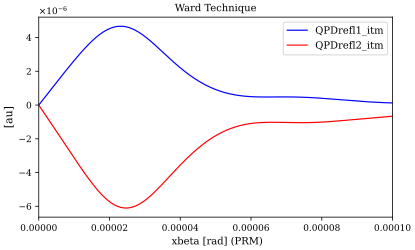

In [148]:
out.plot(['QPDrefl1','QPDrefl2'],title='Ward Technique_PRM ')
out.plot(['QPDrefl1_itm','QPDrefl2_itm'],title='Ward Technique')

In [149]:
#i=0
#for i in np.arange(0, 90, 3):
#    kat.pop_I_f3_raw.phase1 = i
#    #kat4.sQPD1.gouy = i
#    out3 = kat.run()
#    out3.info()
#    out3.plot(['QPDrefl1_itm','QPDrefl2_itm'],title='Ward Technique/Soft mode')
#    print(i)

In [150]:
#i=0
#for i in np.arange(0, 180, 5):
#    kat.s2.gouy = i+90
##    kat.sQPD2.gouy = i
#    out3 = kat.run()
#    out3.info()
#    out3.plot(['QPDrefl1','QPDrefl2'],title='Ward Technique')
#    print(i)

In [151]:
kat_ETM = kat.deepcopy()
kat_ETM.parse("""


#### LOCK ETM ####
set errs pop_I_raw re
lock clocks $errs 3000 100m
put* ETM phi $clocks
noplot clocks
#####

xaxis ETM xbeta lin 0 100u 900

""")

out1 = kat_ETM.run()
out1.info()
#out.plot()

Parsing `set errs pop_I_raw re` into pykat object not implemented yet, added as extra line.
--------------------------------------------------------------
Running kat - Started at 2022-10-18 02:46:32.045394


 95% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 3.31455 seconds

--- Output info ---

Run date and time: 2022-10-18 02:46:32.047969
Detectors used: QPDrefl1, QPDrefl1_itm, QPDrefl2, QPDrefl2_itm, circ_arm, circ_prc, clocks, pop_I_f3_raw, pop_I_raw, pop_Q_f3_raw, pop_Q_raw, refl, refl_I, refl_I_f3, refl_Q, refl_Q_f3, trans

One xaxis used: ['xaxis ETM xbeta lin 0 0.0001 900']
QPDrefl1     : min = 0.000000000000000e+00 max = 7.447724660339100e-16
QPDrefl2     : min = -4.644361480001060e-16 max = 8.539247043703980e-16
QPDrefl1_itm : min = -7.573409052114640e-08 max = 1.525700614095140e-07
QPDrefl2_itm : min = -1.969559251234520e-07 max = 2.466270221397240e-08
circ_arm     : min = 2.064996673880930e-02 max = 3.717151593288960e+04
circ_prc     : min = 8.571102508904300e-01 max = 9.851624377794820e+01
refl         : min = 3.252155032666750e+00 max = 2.564640986017160e+01
trans        : min = 2.310862364556070e-07 max = 3.717300285300370e-01
refl_I       : mi

100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

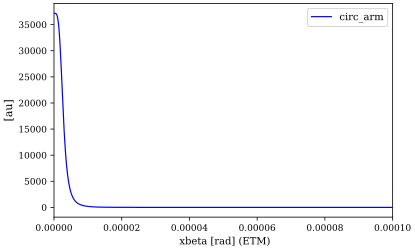

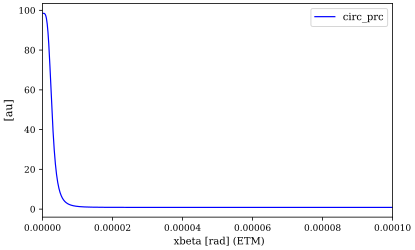

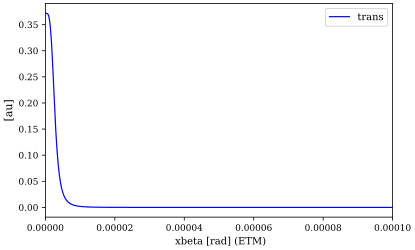

In [152]:
out1.plot(['circ_arm'])
out1.plot(['circ_prc'])
out1.plot(['trans'])

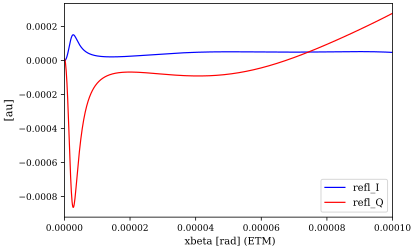

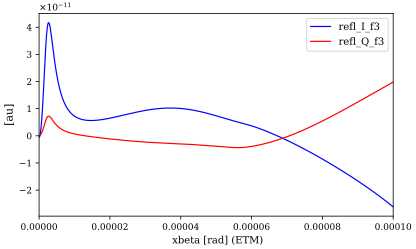

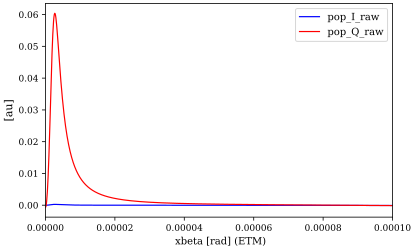

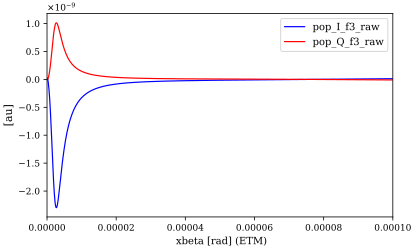

In [153]:
out1.plot(['refl_Q','refl_I'])
out1.plot(['refl_I_f3','refl_Q_f3'])

out1.plot(['pop_I_raw','pop_Q_raw'])
out1.plot(['pop_I_f3_raw','pop_Q_f3_raw'])

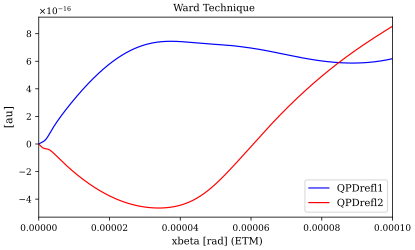

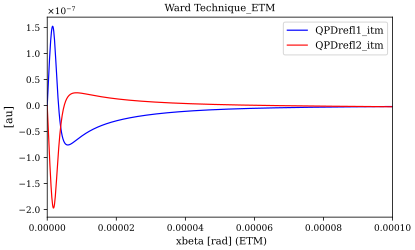

In [154]:
out1.plot(['QPDrefl1','QPDrefl2'],title='Ward Technique ')
out1.plot(['QPDrefl1_itm','QPDrefl2_itm'],title='Ward Technique_ETM')

In [155]:
kat_ITM = kat.deepcopy()
kat_ITM.parse("""


#### LOCK ITM ####
set errs pop_I_raw re
lock clocks $errs 3000 100m
put* ETM phi $clocks
noplot clocks
#####

xaxis ITM xbeta lin 0 100u 900

""")

out2 = kat_ITM.run()
out2.info()
#out.plot()

Parsing `set errs pop_I_raw re` into pykat object not implemented yet, added as extra line.
--------------------------------------------------------------
Running kat - Started at 2022-10-18 02:46:39.200542


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 4.32483 seconds

--- Output info ---

Run date and time: 2022-10-18 02:46:39.200542
Detectors used: QPDrefl1, QPDrefl1_itm, QPDrefl2, QPDrefl2_itm, circ_arm, circ_prc, clocks, pop_I_f3_raw, pop_I_raw, pop_Q_f3_raw, pop_Q_raw, refl, refl_I, refl_I_f3, refl_Q, refl_Q_f3, trans

One xaxis used: ['xaxis ITM xbeta lin 0 0.0001 900']
QPDrefl1     : min = -2.632988446380800e-15 max = 3.943933242602550e-14
QPDrefl2     : min = -1.490044518704890e-14 max = 1.161797276358990e-19
QPDrefl1_itm : min = -6.329074068476140e-07 max = 2.215662004880880e-09
QPDrefl2_itm : min = 0.000000000000000e+00 max = 7.354540492924050e-07
circ_arm     : min = 4.872414322042270e-02 max = 3.717159476902400e+04
circ_prc     : min = 8.882716229294511e-01 max = 9.851656042748679e+01
refl         : min = 3.252092130136700e+00 max = 2.564148120158290e+01
trans        : min = 4.872609226411320e-07 max = 3.717308169229170e-01
refl_I       : mi

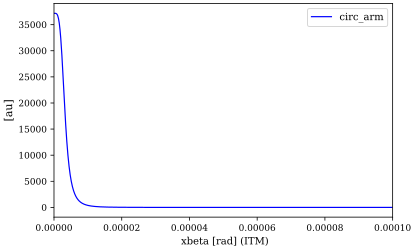

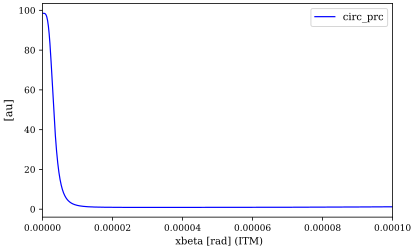

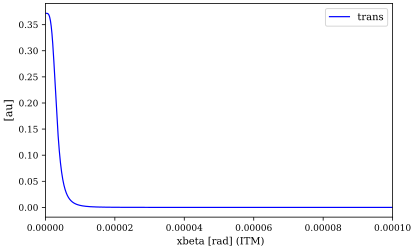

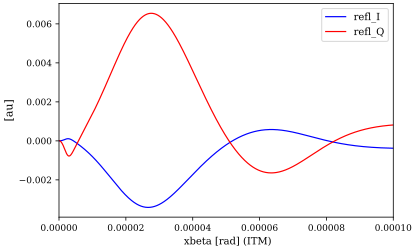

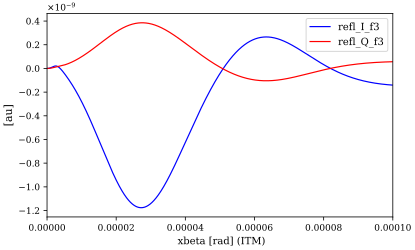

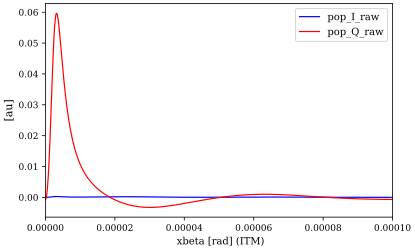

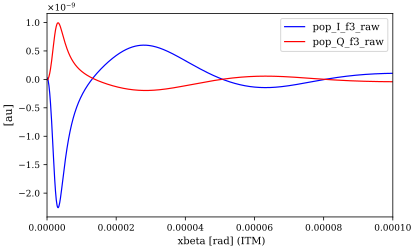

In [156]:
out2.plot(['circ_arm'])
out2.plot(['circ_prc'])
out2.plot(['trans'])

out2.plot(['refl_Q','refl_I'])
out2.plot(['refl_I_f3','refl_Q_f3'])
out2.plot(['pop_I_raw','pop_Q_raw'])
out2.plot(['pop_I_f3_raw','pop_Q_f3_raw'])

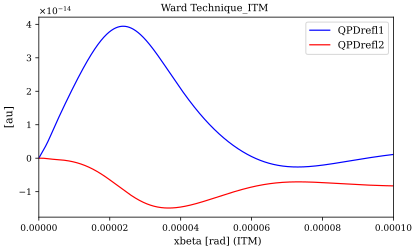

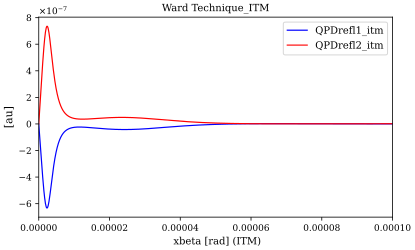

In [157]:
out2.plot(['QPDrefl1','QPDrefl2'],title='Ward Technique_ITM ')
out2.plot(['QPDrefl1_itm','QPDrefl2_itm'],title='Ward Technique_ITM')

In [158]:
#i=0
#for i in np.arange(0, 90, 5):
#    kat_ITM.pop_I_raw.phase1 = i
#    kat_ITM.pop_Q_raw.phase1 = i+90
#    #kat4.sQPD1.gouy = i
#    out2 = kat_ITM.run()
#    #out2.info()
#    #out2.plot(['QPDrefl1_itm','QPDrefl2_itm'],title='Ward Technique/Soft mode')
#    print(i)
#    #out2.plot(['refl_Q','refl_I'])
#    #out2.plot(['refl_I_f3','refl_Q_f3'])
#    out2.plot(['pop_I_raw','pop_Q_raw'])
#    #out2.plot(['pop_I_f3_raw','pop_Q_f3_raw'])